In [1]:
# Import our modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

#import missingno as msno # missing data visualization module for Python
#import pandas_profiling

import gc
import datetime

%matplotlib inline
# Using ggplot's style
plt.style.use('ggplot')

In [2]:
df= pd.read_excel("Deakin - BTdata MAT TY + MAT LY 30-06-2020.xlsx")
df.head()

,ORDER_ID,ORDER_DATE,ORDER_DATE_SEND,ORDER_DATE_UPDATED,ORDER_CURRENCY,ORDER_STATUS,ORDER_REFERENCE_NR,ORDER_VAT,ORDER_TOTAL,ORDER_COMMENT,...,CUSTOMER_SHIPPING_ADDRESS2,CUSTOMER_SHIPPING_POSTCODE,CUSTOMER_SHIPPING_CITY,CUSTOMER_SHIPPING_COUNTRY,CUSTOMER_SHIPPING_COUNTRY_ID,CUSTOMER_SHIPPING_COUNTRY_CODE,CUSTOMER_SHIPPING_PHONE,CUSTOMER_SHIPPING_MOBILE,CUSTOMER_SHIPPING_EMAIL,DELIVERY_DROPPOINT_ID
0,103604,2018-07-01 00:30:52,2018-07-02 15:02:23,2018-07-02 15:02:23,DKK,3,NaN,0.25,198.9,NaN,...,Pakkeshop: 97213,4100.0,Ringsted,DK,0,45.0,NaN,NaN,NaN,97213.0
1,103604,2018-07-01 00:30:52,2018-07-02 15:02:23,2018-07-02 15:02:23,DKK,3,NaN,0.25,198.9,NaN,...,Pakkeshop: 97213,4100.0,Ringsted,DK,0,45.0,NaN,NaN,NaN,97213.0
2,103605,2018-07-01 06:45:05,2018-07-02 15:02:25,2018-07-02 15:02:25,DKK,3,NaN,0.25,523.5,NaN,...,Pakkeshop: 99359,4220.0,Korsør,DK,0,45.0,NaN,NaN,NaN,99359.0
3,103605,2018-07-01 06:45:05,2018-07-02 15:02:25,2018-07-02 15:02:25,DKK,3,NaN,0.25,523.5,NaN,...,Pakkeshop: 99359,4220.0,Korsør,DK,0,45.0,NaN,NaN,NaN,99359.0
4,103605,2018-07-01 06:45:05,2018-07-02 15:02:25,2018-07-02 15:02:25,DKK,3,NaN,0.25,523.5,NaN,...,Pakkeshop: 99359,4220.0,Korsør,DK,0,45.0,NaN,NaN,NaN,99359.0


In [3]:
df.head(25)

,ORDER_ID,ORDER_DATE,ORDER_DATE_SEND,ORDER_DATE_UPDATED,ORDER_CURRENCY,ORDER_STATUS,ORDER_REFERENCE_NR,ORDER_VAT,ORDER_TOTAL,ORDER_COMMENT,...,CUSTOMER_SHIPPING_ADDRESS2,CUSTOMER_SHIPPING_POSTCODE,CUSTOMER_SHIPPING_CITY,CUSTOMER_SHIPPING_COUNTRY,CUSTOMER_SHIPPING_COUNTRY_ID,CUSTOMER_SHIPPING_COUNTRY_CODE,CUSTOMER_SHIPPING_PHONE,CUSTOMER_SHIPPING_MOBILE,CUSTOMER_SHIPPING_EMAIL,DELIVERY_DROPPOINT_ID
0,103604,2018-07-01 00:30:52,2018-07-02 15:02:23,2018-07-02 15:02:23,DKK,3,NaN,0.25,198.90,NaN,...,Pakkeshop: 97213,4100.0,Ringsted,DK,0,45.0,NaN,NaN,NaN,97213.0
1,103604,2018-07-01 00:30:52,2018-07-02 15:02:23,2018-07-02 15:02:23,DKK,3,NaN,0.25,198.90,NaN,...,Pakkeshop: 97213,4100.0,Ringsted,DK,0,45.0,NaN,NaN,NaN,97213.0
2,103605,2018-07-01 06:45:05,2018-07-02 15:02:25,2018-07-02 15:02:25,DKK,3,NaN,0.25,523.50,NaN,...,Pakkeshop: 99359,4220.0,Korsør,DK,0,45.0,NaN,NaN,NaN,99359.0
3,103605,2018-07-01 06:45:05,2018-07-02 15:02:25,2018-07-02 15:02:25,DKK,3,NaN,0.25,523.50,NaN,...,Pakkeshop: 99359,4220.0,Korsør,DK,0,45.0,NaN,NaN,NaN,99359.0
4,103605,2018-07-01 06:45:05,2018-07-02 15:02:25,2018-07-02 15:02:25,DKK,3,NaN,0.25,523.50,NaN,...,Pakkeshop: 99359,4220.0,Korsør,DK,0,45.0,NaN,NaN,NaN,99359.0
5,103606,2018-07-01 08:42:50,2018-07-02 15:02:26,2018-07-02 15:02:26,DKK,3,NaN,0.25,279.90,NaN,...,Pakkeshop: 96996,6520.0,Toftlund,DK,0,45.0,NaN,NaN,NaN,96996.0
6,103606,2018-07-01 08:42:50,2018-07-02 15:02:26,2018-07-02 15:02:26,DKK,3,NaN,0.25,279.90,NaN,...,Pakkeshop: 96996,6520.0,Toftlund,DK,0,45.0,NaN,NaN,NaN,96996.0
7,103606,2018-07-01 08:42:50,2018-07-02 15:02:26,2018-07-02 15:02:26,DKK,3,NaN,0.25,279.90,NaN,...,Pakkeshop: 96996,6520.0,Toftlund,DK,0,45.0,NaN,NaN,NaN,96996.0
8,103607,2018-07-01 09:05:11,2018-07-02 15:02:28,2018-07-02 15:02:28,DKK,3,NaN,0.25,308.80,NaN,...,Pakkeshop: 96072,6740.0,Bramming,DK,0,45.0,NaN,NaN,NaN,96072.0
9,103607,2018-07-01 09:05:11,2018-07-02 15:02:28,2018-07-02 15:02:28,DKK,3,NaN,0.25,308.80,NaN,...,Pakkeshop: 96072,6740.0,Bramming,DK,0,45.0,NaN,NaN,NaN,96072.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178987 entries, 0 to 178986
Data columns (total 82 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   ORDER_ID                         178987 non-null  int64         
 1   ORDER_DATE                       178987 non-null  datetime64[ns]
 2   ORDER_DATE_SEND                  178987 non-null  object        
 3   ORDER_DATE_UPDATED               178987 non-null  object        
 4   ORDER_CURRENCY                   178987 non-null  object        
 5   ORDER_STATUS                     178987 non-null  int64         
 6   ORDER_REFERENCE_NR               0 non-null       float64       
 7   ORDER_VAT                        178987 non-null  float64       
 8   ORDER_TOTAL                      178987 non-null  float64       
 9   ORDER_COMMENT                    295 non-null     object        
 10  ORDER_COMMENT_EXTERNAL           117 non-nul

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
pd.set_option('display.max_rows', None)

In [7]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

PRODUCT_TITLE3                     178987
PRODUCT_EXTENDED_DATA_INTERNAL     178987
CUSTOMER_EXTENDED_DATA_INTERNAL    178987
CUSTOMER_EXTENDED_DATA_EXTERNAL    178987
ORDER_REFERENCE_NR                 178987
PRODUCT_TRACKING_CODE              178987
CUSTOMER_EAN                       178987
CUSTOMER_SHIPPING_EMAIL            178987
PRODUCT_COMMENT                    178986
PRODUCT_STATUS_ID                  178986
PRODUCT_EXTENDED_DATA_EXTERNAL     178986
USER_NUMBER                        178916
ORDER_COMMENT_EXTERNAL             178870
CUSTOMER_SHIPPING_PHONE            178790
ORDER_COMMENT                      178692
CUSTOMER_SHIPPING_COMPANY          178579
PRODUCT_SERVICE_TYPE               178519
CUSTOMER_SHIPPING_MOBILE           178124
PRODUCT_TITLE2                     178024
DISCOUNT_CODE                      176070
ORDER_COMMENT_CUSTOMER             175763
CUSTOMER_CVR                       170359
CUSTOMER_COMPANY                   167650
ORDER_COMMENT_DELIVERY            

In [8]:
#selecting specific columns
df2 = df[['ORDER_ID', 'ORDER_DATE','ORDER_STATUS', 'ORDER_TOTAL',
        'ORDER_ORIGIN','PAYMENT_TITLE','PAYMENT_PRICE','PAYMENT_CARD_TYPE','PRODUCT_AMOUNT', 'PRODUCT_PRICE',
         'PRODUCT_ID','PRODUCT_TITLE1', 
        'PRODUCT_DISCOUNT', 'CUSTOMER_COUNTRY',
        'CUSTOMER_CITY', 'CUSTOMER_POSTCODE','DELIVERY_PRICE' ]].copy()

In [9]:
#selecting specific columns
df_location = df[['ORDER_ID', 'ORDER_DATE','ORDER_STATUS', 'ORDER_TOTAL',
        'ORDER_ORIGIN','PAYMENT_TITLE','PAYMENT_PRICE','PAYMENT_CARD_TYPE','PRODUCT_AMOUNT', 'PRODUCT_PRICE',
         'PRODUCT_ID','PRODUCT_TITLE1', 
        'PRODUCT_DISCOUNT', 'CUSTOMER_COUNTRY',
        'CUSTOMER_CITY', 'CUSTOMER_POSTCODE' ,'DELIVERY_PRICE','CUSTOMER_FIRSTNAME','CUSTOMER_LASTNAME','CUSTOMER_ADDRESS']].copy()

In [174]:
df22=df2[df2['PRODUCT_ID'] == '2241']
df22.head()

,ORDER_ID,ORDER_DATE,ORDER_STATUS,ORDER_TOTAL,ORDER_ORIGIN,hour,PAYMENT_TITLE,PAYMENT_PRICE,PAYMENT_CARD_TYPE,PRODUCT_AMOUNT,PRODUCT_PRICE,PRODUCT_ID,PRODUCT_TITLE1,PRODUCT_DISCOUNT,CUSTOMER_COUNTRY,CUSTOMER_CITY,CUSTOMER_POSTCODE,DELIVERY_PRICE,month_year,year,month,day,quarter,AMOUNT_SPENT
1410,104055,2018-07-11 13:13:48,3,193.95,webshop,13,Kreditkortbetaling,0.0,mastercard-debet,1.0,55.96,2241,"Kakaosmør, dråber - 200 gram",0.0,DK,Søborg,2860,39.0,2018-07,2018,7,11,3,55.96
1579,104110,2018-07-13 12:45:54,3,748.75,webshop,12,Kreditkortbetaling,0.0,mastercard,1.0,55.96,2241,"Kakaosmør, dråber - 200 gram",0.0,DK,København S,2300,0.0,2018-07,2018,7,13,3,55.96
8197,106160,2018-08-23 13:40:51,3,108.95,webshop,13,Kreditkortbetaling,0.0,dankort,1.0,55.96,2241,"Kakaosmør, dråber - 200 gram",0.0,DK,Rødekro,6230,39.0,2018-08,2018,8,23,3,55.96
9225,106449,2018-08-29 17:04:55,3,178.85,webshop,17,Kreditkortbetaling,0.0,dankort,1.0,55.96,2241,"Kakaosmør, dråber - 200 gram",0.0,DK,Gram,6510,39.0,2018-08,2018,8,29,3,55.96
11218,107052,2018-09-09 15:41:28,3,804.45,webshop,15,Kreditkortbetaling,0.0,dankort,2.0,55.96,2241,"Kakaosmør, dråber - 200 gram",0.0,DK,Gesten,6621,0.0,2018-09,2018,9,9,3,111.92


In [10]:
# df_new without missing values
df_location = df_location.dropna(subset=['PRODUCT_ID','CUSTOMER_CITY','CUSTOMER_POSTCODE','PRODUCT_DISCOUNT','PAYMENT_PRICE',
                         'PAYMENT_CARD_TYPE'])
df_location.head()

,ORDER_ID,ORDER_DATE,ORDER_STATUS,ORDER_TOTAL,ORDER_ORIGIN,PAYMENT_TITLE,PAYMENT_PRICE,PAYMENT_CARD_TYPE,PRODUCT_AMOUNT,PRODUCT_PRICE,PRODUCT_ID,PRODUCT_TITLE1,PRODUCT_DISCOUNT,CUSTOMER_COUNTRY,CUSTOMER_CITY,CUSTOMER_POSTCODE,DELIVERY_PRICE,CUSTOMER_FIRSTNAME,CUSTOMER_LASTNAME,CUSTOMER_ADDRESS
0,103604,2018-07-01 00:30:52,3,198.9,webshop,Kreditkortbetaling,0.0,dankort,1.0,47.96,524,Sprøjtepose og tyller sæt (7 dele),0.00,DK,Ringsted,4100,39.0,Stine,Duran,Askevang 3
1,103604,2018-07-01 00:30:52,3,198.9,webshop,Kreditkortbetaling,0.0,dankort,1.0,120.00,3999,Funcakes spiselig pastafarver sæt/8,40.04,DK,Ringsted,4100,39.0,Stine,Duran,Askevang 3
2,103605,2018-07-01 06:45:05,3,523.5,webshop,Kreditkortbetaling,0.0,dankort,1.0,103.96,2194,"Brudepar topfigur - hånd-i-hånd, 14 cm",0.00,DK,Korsør,4220,39.0,Laszlo,Bochesa,Tyreengen 16
3,103605,2018-07-01 06:45:05,3,523.5,webshop,Kreditkortbetaling,0.0,dankort,1.0,27.96,3914,Kagelys 2D med Skye Paw Patrol,0.00,DK,Korsør,4220,39.0,Laszlo,Bochesa,Tyreengen 16
4,103605,2018-07-01 06:45:05,3,523.5,webshop,Kreditkortbetaling,0.0,dankort,8.0,31.96,3133,Sukkerdekoration hvide margueritter (12 stk.),0.00,DK,Korsør,4220,39.0,Laszlo,Bochesa,Tyreengen 16


In [11]:
# check missing values for each column 
df_location.isnull().sum().sort_values(ascending=False)

CUSTOMER_ADDRESS      0
CUSTOMER_LASTNAME     0
ORDER_DATE            0
ORDER_STATUS          0
ORDER_TOTAL           0
ORDER_ORIGIN          0
PAYMENT_TITLE         0
PAYMENT_PRICE         0
PAYMENT_CARD_TYPE     0
PRODUCT_AMOUNT        0
PRODUCT_PRICE         0
PRODUCT_ID            0
PRODUCT_TITLE1        0
PRODUCT_DISCOUNT      0
CUSTOMER_COUNTRY      0
CUSTOMER_CITY         0
CUSTOMER_POSTCODE     0
DELIVERY_PRICE        0
CUSTOMER_FIRSTNAME    0
ORDER_ID              0
dtype: int64

In [12]:
#converting negative values of columns to zero
df_location= df_location[df_location['ORDER_TOTAL'] >= 0] 
df_location=df_location[df_location['PAYMENT_PRICE'] >= 0]
df_location=df_location[df_location['PRODUCT_AMOUNT'] >= 0]
df_location=df_location[df_location['PRODUCT_PRICE'] >0]

In [13]:
df_location['AMOUNT_SPENT']= df_location['PRODUCT_PRICE']- df_location['PRODUCT_DISCOUNT'] 
df_location['AMOUNT_SPENT']= df_location['PRODUCT_AMOUNT']*df_location['AMOUNT_SPENT']

In [14]:
df_location.head()

,ORDER_ID,ORDER_DATE,ORDER_STATUS,ORDER_TOTAL,ORDER_ORIGIN,PAYMENT_TITLE,PAYMENT_PRICE,PAYMENT_CARD_TYPE,PRODUCT_AMOUNT,PRODUCT_PRICE,PRODUCT_ID,PRODUCT_TITLE1,PRODUCT_DISCOUNT,CUSTOMER_COUNTRY,CUSTOMER_CITY,CUSTOMER_POSTCODE,DELIVERY_PRICE,CUSTOMER_FIRSTNAME,CUSTOMER_LASTNAME,CUSTOMER_ADDRESS,AMOUNT_SPENT
0,103604,2018-07-01 00:30:52,3,198.9,webshop,Kreditkortbetaling,0.0,dankort,1.0,47.96,524,Sprøjtepose og tyller sæt (7 dele),0.00,DK,Ringsted,4100,39.0,Stine,Duran,Askevang 3,47.96
1,103604,2018-07-01 00:30:52,3,198.9,webshop,Kreditkortbetaling,0.0,dankort,1.0,120.00,3999,Funcakes spiselig pastafarver sæt/8,40.04,DK,Ringsted,4100,39.0,Stine,Duran,Askevang 3,79.96
2,103605,2018-07-01 06:45:05,3,523.5,webshop,Kreditkortbetaling,0.0,dankort,1.0,103.96,2194,"Brudepar topfigur - hånd-i-hånd, 14 cm",0.00,DK,Korsør,4220,39.0,Laszlo,Bochesa,Tyreengen 16,103.96
3,103605,2018-07-01 06:45:05,3,523.5,webshop,Kreditkortbetaling,0.0,dankort,1.0,27.96,3914,Kagelys 2D med Skye Paw Patrol,0.00,DK,Korsør,4220,39.0,Laszlo,Bochesa,Tyreengen 16,27.96
4,103605,2018-07-01 06:45:05,3,523.5,webshop,Kreditkortbetaling,0.0,dankort,8.0,31.96,3133,Sukkerdekoration hvide margueritter (12 stk.),0.00,DK,Korsør,4220,39.0,Laszlo,Bochesa,Tyreengen 16,255.68


In [15]:
df_location.to_excel('clean_data_final.xlsx', index=False)

In [15]:
df_location.describe()

,ORDER_ID,ORDER_STATUS,ORDER_TOTAL,PAYMENT_PRICE,PRODUCT_AMOUNT,PRODUCT_PRICE,PRODUCT_DISCOUNT
count,171387.000000,171387.000000,171387.000000,171387.0,171387.000000,171387.000000,171387.000000
mean,131196.244523,3.093759,380.832440,0.0,1.340125,48.726390,1.247824
std,15750.979896,0.963552,292.411019,0.0,2.915277,61.053713,9.169755
min,103604.000000,3.000000,1.000000,0.0,0.000000,0.800000,0.000000
25%,117589.000000,3.000000,194.800000,0.0,1.000000,19.960000,0.000000
50%,131612.000000,3.000000,306.250000,0.0,1.000000,28.000000,0.000000
75%,144980.000000,3.000000,513.115000,0.0,1.000000,59.200000,0.000000
max,157950.000000,100.000000,14028.390000,0.0,1000.000000,3996.000000,1598.400000


In [10]:
df2.describe()


,ORDER_ID,ORDER_STATUS,ORDER_TOTAL,PAYMENT_PRICE,PRODUCT_AMOUNT,PRODUCT_PRICE,PRODUCT_DISCOUNT,DELIVERY_PRICE
count,178987.000000,178987.000000,178987.000000,178944.000000,178986.000000,178986.000000,178926.000000,178987.000000
mean,131255.513071,3.700531,383.257504,0.025751,1.329411,46.994816,1.216338,28.820275
std,15717.683051,7.632435,350.502990,2.481214,2.972472,62.347239,9.127538,22.507682
min,103604.000000,3.000000,-1649.000000,-279.850000,-12.000000,-1474.760000,0.000000,-59.950000
25%,117724.000000,3.000000,194.500000,0.000000,1.000000,19.960000,0.000000,0.000000
50%,131679.000000,3.000000,308.270000,0.000000,1.000000,27.960000,0.000000,39.950000
75%,144982.000000,3.000000,514.120000,0.000000,1.000000,55.960000,0.000000,39.950000
max,157950.000000,100.000000,20000.000000,29.000000,1000.000000,3996.000000,1598.400000,399.000000


In [11]:
# df_new without missing values
df2 = df2.dropna(subset=['PRODUCT_ID','CUSTOMER_CITY','CUSTOMER_POSTCODE','PRODUCT_DISCOUNT','PAYMENT_PRICE',
                         'PAYMENT_CARD_TYPE'])
df2.head()

,ORDER_ID,ORDER_DATE,ORDER_STATUS,ORDER_TOTAL,ORDER_ORIGIN,PAYMENT_TITLE,PAYMENT_PRICE,PAYMENT_CARD_TYPE,PRODUCT_AMOUNT,PRODUCT_PRICE,PRODUCT_ID,PRODUCT_TITLE1,PRODUCT_DISCOUNT,CUSTOMER_COUNTRY,CUSTOMER_CITY,CUSTOMER_POSTCODE,DELIVERY_PRICE
0,103604,2018-07-01 00:30:52,3,198.9,webshop,Kreditkortbetaling,0.0,dankort,1.0,47.96,524,Sprøjtepose og tyller sæt (7 dele),0.00,DK,Ringsted,4100,39.0
1,103604,2018-07-01 00:30:52,3,198.9,webshop,Kreditkortbetaling,0.0,dankort,1.0,120.00,3999,Funcakes spiselig pastafarver sæt/8,40.04,DK,Ringsted,4100,39.0
2,103605,2018-07-01 06:45:05,3,523.5,webshop,Kreditkortbetaling,0.0,dankort,1.0,103.96,2194,"Brudepar topfigur - hånd-i-hånd, 14 cm",0.00,DK,Korsør,4220,39.0
3,103605,2018-07-01 06:45:05,3,523.5,webshop,Kreditkortbetaling,0.0,dankort,1.0,27.96,3914,Kagelys 2D med Skye Paw Patrol,0.00,DK,Korsør,4220,39.0
4,103605,2018-07-01 06:45:05,3,523.5,webshop,Kreditkortbetaling,0.0,dankort,8.0,31.96,3133,Sukkerdekoration hvide margueritter (12 stk.),0.00,DK,Korsør,4220,39.0


In [12]:
df2.isnull().sum()

ORDER_ID             0
ORDER_DATE           0
ORDER_STATUS         0
ORDER_TOTAL          0
ORDER_ORIGIN         0
PAYMENT_TITLE        0
PAYMENT_PRICE        0
PAYMENT_CARD_TYPE    0
PRODUCT_AMOUNT       0
PRODUCT_PRICE        0
PRODUCT_ID           0
PRODUCT_TITLE1       0
PRODUCT_DISCOUNT     0
CUSTOMER_COUNTRY     0
CUSTOMER_CITY        0
CUSTOMER_POSTCODE    0
DELIVERY_PRICE       0
dtype: int64

In [13]:
#convert Product_id from string to int 
df2['PRODUCT_ID'] = df2['PRODUCT_ID'].astype(str).astype(int)

In [14]:
df2.describe()

,ORDER_ID,ORDER_STATUS,ORDER_TOTAL,PAYMENT_PRICE,PRODUCT_AMOUNT,PRODUCT_PRICE,PRODUCT_ID,PRODUCT_DISCOUNT,DELIVERY_PRICE
count,178118.000000,178118.000000,178118.000000,178118.000000,178118.00000,178118.000000,178118.000000,178118.000000,178118.000000
mean,131256.707250,3.691154,379.870395,-0.032254,1.31492,47.031838,2859.529121,1.213144,28.900233
std,15716.229489,7.631533,300.538409,2.112158,2.86858,61.852436,1589.790324,9.065688,22.419884
min,103604.000000,3.000000,-1588.660000,-279.850000,-11.00000,-1474.760000,13.000000,0.000000,-59.950000
25%,117727.000000,3.000000,194.650000,0.000000,1.00000,19.960000,1399.000000,0.000000,0.000000
50%,131683.000000,3.000000,307.950000,0.000000,1.00000,27.960000,3175.000000,0.000000,39.950000
75%,144969.000000,3.000000,513.920000,0.000000,1.00000,55.960000,4355.000000,0.000000,39.950000
max,157950.000000,100.000000,14028.390000,0.000000,1000.00000,3996.000000,5600.000000,1598.400000,399.000000


In [15]:
df2.head()

,ORDER_ID,ORDER_DATE,ORDER_STATUS,ORDER_TOTAL,ORDER_ORIGIN,PAYMENT_TITLE,PAYMENT_PRICE,PAYMENT_CARD_TYPE,PRODUCT_AMOUNT,PRODUCT_PRICE,PRODUCT_ID,PRODUCT_TITLE1,PRODUCT_DISCOUNT,CUSTOMER_COUNTRY,CUSTOMER_CITY,CUSTOMER_POSTCODE,DELIVERY_PRICE
0,103604,2018-07-01 00:30:52,3,198.9,webshop,Kreditkortbetaling,0.0,dankort,1.0,47.96,524,Sprøjtepose og tyller sæt (7 dele),0.00,DK,Ringsted,4100,39.0
1,103604,2018-07-01 00:30:52,3,198.9,webshop,Kreditkortbetaling,0.0,dankort,1.0,120.00,3999,Funcakes spiselig pastafarver sæt/8,40.04,DK,Ringsted,4100,39.0
2,103605,2018-07-01 06:45:05,3,523.5,webshop,Kreditkortbetaling,0.0,dankort,1.0,103.96,2194,"Brudepar topfigur - hånd-i-hånd, 14 cm",0.00,DK,Korsør,4220,39.0
3,103605,2018-07-01 06:45:05,3,523.5,webshop,Kreditkortbetaling,0.0,dankort,1.0,27.96,3914,Kagelys 2D med Skye Paw Patrol,0.00,DK,Korsør,4220,39.0
4,103605,2018-07-01 06:45:05,3,523.5,webshop,Kreditkortbetaling,0.0,dankort,8.0,31.96,3133,Sukkerdekoration hvide margueritter (12 stk.),0.00,DK,Korsør,4220,39.0


In [16]:
#converting negative values of columns to zero
df2= df2[df2['ORDER_TOTAL'] >= 0] 

In [17]:
df2=df2[df2['PAYMENT_PRICE'] >= 0]

In [18]:
df2=df2[df2['PRODUCT_AMOUNT'] >= 0]

In [19]:
df2=df2[df2['PRODUCT_PRICE'] >0]

In [20]:
df2.describe()

,ORDER_ID,ORDER_STATUS,ORDER_TOTAL,PAYMENT_PRICE,PRODUCT_AMOUNT,PRODUCT_PRICE,PRODUCT_ID,PRODUCT_DISCOUNT,DELIVERY_PRICE
count,171387.000000,171387.000000,171387.000000,171387.0,171387.000000,171387.000000,171387.000000,171387.000000,171387.000000
mean,131196.244523,3.093759,380.832440,0.0,1.340125,48.726390,2851.064690,1.247824,29.331640
std,15750.979896,0.963552,292.411019,0.0,2.915277,61.053713,1582.324143,9.169755,22.098618
min,103604.000000,3.000000,1.000000,0.0,0.000000,0.800000,13.000000,0.000000,0.000000
25%,117589.000000,3.000000,194.800000,0.0,1.000000,19.960000,1401.000000,0.000000,0.000000
50%,131612.000000,3.000000,306.250000,0.0,1.000000,28.000000,3139.000000,0.000000,39.950000
75%,144980.000000,3.000000,513.115000,0.0,1.000000,59.200000,4307.000000,0.000000,39.950000
max,157950.000000,100.000000,14028.390000,0.0,1000.000000,3996.000000,5600.000000,1598.400000,399.000000


In [21]:
# order status 3 and 8
df2= df2.loc[df2['ORDER_STATUS'].isin(['3','8'])]

In [22]:
df2.shape

(171370, 17)

In [23]:
# Let's add Month, Day and Hour Colummns that we'll use for further analysis
# Starting with Month_Year First
df2['month_year'] = df2['ORDER_DATE'].dt.to_period('M')
df2.head()

,ORDER_ID,ORDER_DATE,ORDER_STATUS,ORDER_TOTAL,ORDER_ORIGIN,PAYMENT_TITLE,PAYMENT_PRICE,PAYMENT_CARD_TYPE,PRODUCT_AMOUNT,PRODUCT_PRICE,PRODUCT_ID,PRODUCT_TITLE1,PRODUCT_DISCOUNT,CUSTOMER_COUNTRY,CUSTOMER_CITY,CUSTOMER_POSTCODE,DELIVERY_PRICE,month_year
0,103604,2018-07-01 00:30:52,3,198.9,webshop,Kreditkortbetaling,0.0,dankort,1.0,47.96,524,Sprøjtepose og tyller sæt (7 dele),0.00,DK,Ringsted,4100,39.0,2018-07
1,103604,2018-07-01 00:30:52,3,198.9,webshop,Kreditkortbetaling,0.0,dankort,1.0,120.00,3999,Funcakes spiselig pastafarver sæt/8,40.04,DK,Ringsted,4100,39.0,2018-07
2,103605,2018-07-01 06:45:05,3,523.5,webshop,Kreditkortbetaling,0.0,dankort,1.0,103.96,2194,"Brudepar topfigur - hånd-i-hånd, 14 cm",0.00,DK,Korsør,4220,39.0,2018-07
3,103605,2018-07-01 06:45:05,3,523.5,webshop,Kreditkortbetaling,0.0,dankort,1.0,27.96,3914,Kagelys 2D med Skye Paw Patrol,0.00,DK,Korsør,4220,39.0,2018-07
4,103605,2018-07-01 06:45:05,3,523.5,webshop,Kreditkortbetaling,0.0,dankort,8.0,31.96,3133,Sukkerdekoration hvide margueritter (12 stk.),0.00,DK,Korsør,4220,39.0,2018-07


In [24]:
L = ['year', 'month', 'day', 'quarter']
df2 = df2.join(pd.concat((getattr(df2['ORDER_DATE'].dt, i).rename(i) for i in L), axis=1))
df2.head(30)

,ORDER_ID,ORDER_DATE,ORDER_STATUS,ORDER_TOTAL,ORDER_ORIGIN,PAYMENT_TITLE,PAYMENT_PRICE,PAYMENT_CARD_TYPE,PRODUCT_AMOUNT,PRODUCT_PRICE,PRODUCT_ID,PRODUCT_TITLE1,PRODUCT_DISCOUNT,CUSTOMER_COUNTRY,CUSTOMER_CITY,CUSTOMER_POSTCODE,DELIVERY_PRICE,month_year,year,month,day,quarter
0,103604,2018-07-01 00:30:52,3,198.90,webshop,Kreditkortbetaling,0.0,dankort,1.0,47.96,524,Sprøjtepose og tyller sæt (7 dele),0.00,DK,Ringsted,4100,39.0,2018-07,2018,7,1,3
1,103604,2018-07-01 00:30:52,3,198.90,webshop,Kreditkortbetaling,0.0,dankort,1.0,120.00,3999,Funcakes spiselig pastafarver sæt/8,40.04,DK,Ringsted,4100,39.0,2018-07,2018,7,1,3
2,103605,2018-07-01 06:45:05,3,523.50,webshop,Kreditkortbetaling,0.0,dankort,1.0,103.96,2194,"Brudepar topfigur - hånd-i-hånd, 14 cm",0.00,DK,Korsør,4220,39.0,2018-07,2018,7,1,3
3,103605,2018-07-01 06:45:05,3,523.50,webshop,Kreditkortbetaling,0.0,dankort,1.0,27.96,3914,Kagelys 2D med Skye Paw Patrol,0.00,DK,Korsør,4220,39.0,2018-07,2018,7,1,3
4,103605,2018-07-01 06:45:05,3,523.50,webshop,Kreditkortbetaling,0.0,dankort,8.0,31.96,3133,Sukkerdekoration hvide margueritter (12 stk.),0.00,DK,Korsør,4220,39.0,2018-07,2018,7,1,3
5,103606,2018-07-01 08:42:50,3,279.90,webshop,Kreditkortbetaling,0.0,dankort,2.0,70.40,1039,Fondant hvid vanilje - 1 kg,0.00,DK,Toftlund,6520,39.0,2018-07,2018,7,1,3
6,103606,2018-07-01 08:42:50,3,279.90,webshop,Kreditkortbetaling,0.0,dankort,1.0,31.96,304,Glatteværktøj,0.00,DK,Toftlund,6520,39.0,2018-07,2018,7,1,3
7,103606,2018-07-01 08:42:50,3,279.90,webshop,Kreditkortbetaling,0.0,dankort,1.0,19.96,826,Pastafarve sort - 30 ml,0.00,DK,Toftlund,6520,39.0,2018-07,2018,7,1,3
8,103607,2018-07-01 09:05:11,3,308.80,webshop,Kreditkortbetaling,0.0,dankort,1.0,71.96,1299,"Stempel udstikkersæt - bogstaver, symboler, tal",0.00,DK,Bramming,6740,39.0,2018-07,2018,7,1,3
9,103607,2018-07-01 09:05:11,3,308.80,webshop,Kreditkortbetaling,0.0,dankort,1.0,39.96,1471,Hindbær aroma - 30 ml,0.00,DK,Bramming,6740,39.0,2018-07,2018,7,1,3


In [25]:
df2['day'].value_counts()

2     7130
5     6571
4     6542
3     6517
9     6401
29    6262
11    6046
1     6025
6     5958
7     5941
10    5908
8     5806
13    5791
15    5710
17    5609
16    5498
12    5450
14    5412
28    5391
18    5286
30    5239
19    5163
27    5153
22    5090
23    4963
26    4865
21    4781
20    4734
24    4707
25    4384
31    3037
Name: day, dtype: int64

In [26]:
# Insert a new column as our 6th column (index 5) with our Hour extracted from InvoiceDate
df2.insert(loc=5, column='hour', value=df2.ORDER_DATE .dt.hour)

In [27]:
df2.head()

,ORDER_ID,ORDER_DATE,ORDER_STATUS,ORDER_TOTAL,ORDER_ORIGIN,hour,PAYMENT_TITLE,PAYMENT_PRICE,PAYMENT_CARD_TYPE,PRODUCT_AMOUNT,PRODUCT_PRICE,PRODUCT_ID,PRODUCT_TITLE1,PRODUCT_DISCOUNT,CUSTOMER_COUNTRY,CUSTOMER_CITY,CUSTOMER_POSTCODE,DELIVERY_PRICE,month_year,year,month,day,quarter
0,103604,2018-07-01 00:30:52,3,198.9,webshop,0,Kreditkortbetaling,0.0,dankort,1.0,47.96,524,Sprøjtepose og tyller sæt (7 dele),0.00,DK,Ringsted,4100,39.0,2018-07,2018,7,1,3
1,103604,2018-07-01 00:30:52,3,198.9,webshop,0,Kreditkortbetaling,0.0,dankort,1.0,120.00,3999,Funcakes spiselig pastafarver sæt/8,40.04,DK,Ringsted,4100,39.0,2018-07,2018,7,1,3
2,103605,2018-07-01 06:45:05,3,523.5,webshop,6,Kreditkortbetaling,0.0,dankort,1.0,103.96,2194,"Brudepar topfigur - hånd-i-hånd, 14 cm",0.00,DK,Korsør,4220,39.0,2018-07,2018,7,1,3
3,103605,2018-07-01 06:45:05,3,523.5,webshop,6,Kreditkortbetaling,0.0,dankort,1.0,27.96,3914,Kagelys 2D med Skye Paw Patrol,0.00,DK,Korsør,4220,39.0,2018-07,2018,7,1,3
4,103605,2018-07-01 06:45:05,3,523.5,webshop,6,Kreditkortbetaling,0.0,dankort,8.0,31.96,3133,Sukkerdekoration hvide margueritter (12 stk.),0.00,DK,Korsør,4220,39.0,2018-07,2018,7,1,3


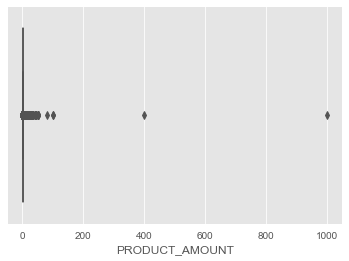

In [27]:
#checking for outliers
sns.boxplot(df2.PRODUCT_AMOUNT)

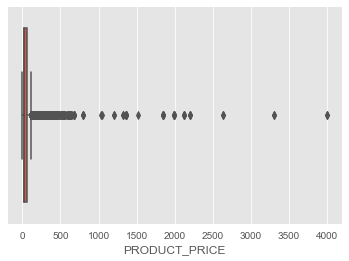

In [28]:
#checking for outliers
sns.boxplot(df2.PRODUCT_PRICE)

In [46]:
# What are the free items
df_free = df2[df2.PRODUCT_PRICE == 0]
print(len(df_free))
df_free.head()

0


,ORDER_ID,ORDER_DATE,ORDER_STATUS,ORDER_TOTAL,ORDER_ORIGIN,hour,PAYMENT_TITLE,PAYMENT_PRICE,PAYMENT_CARD_TYPE,PRODUCT_AMOUNT,PRODUCT_PRICE,PRODUCT_ID,PRODUCT_TITLE1,PRODUCT_DISCOUNT,CUSTOMER_COUNTRY,CUSTOMER_CITY,CUSTOMER_POSTCODE,DELIVERY_PRICE,month_year,year,month,day,quarter,AMOUNT_SPENT


In [47]:
# See when these free items were given out
df_free.month_year.value_counts().sort_index()

Series([], Freq: M, Name: month_year, dtype: int64)

IndexError: index 0 is out of bounds for axis 0 with size 0

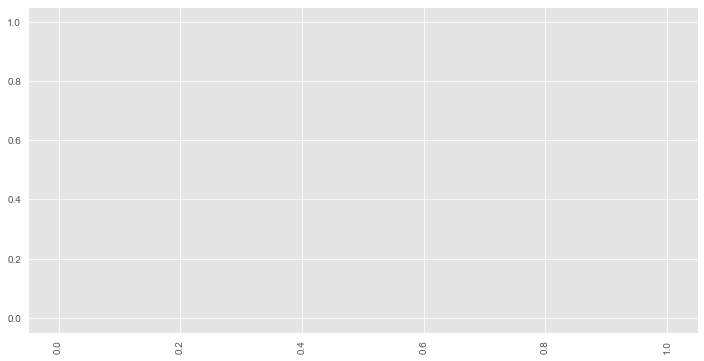

In [31]:
# Ploting the above data
ax = df_free.month_year.value_counts().sort_index()
ax.plot(kind = 'bar',figsize=(12,6))
# Add title and axis names
plt.title('Frequency for different Months (july 2018 - June 2020)')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#df2.to_excel('clean_datahour.xlsx', index=False)

In [28]:
df2.shape

(171370, 23)

# Promotions

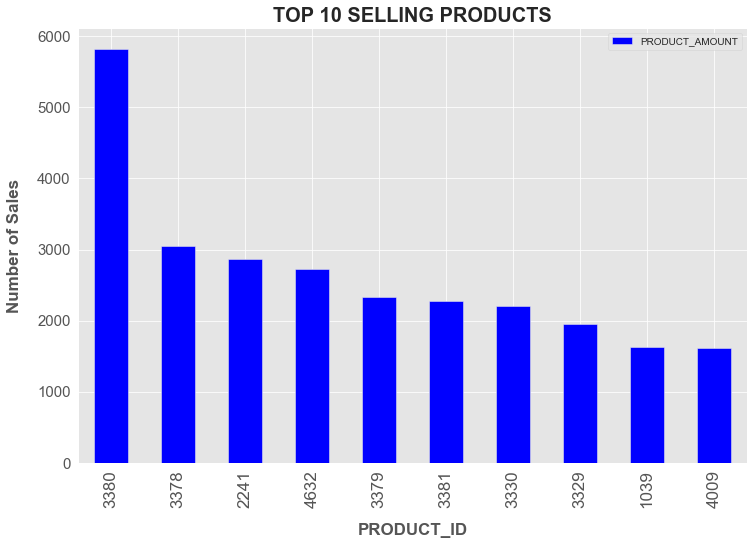

In [29]:
# We have taken PRODUCT_AMOUNT to calculate the sale of each PRODUCT_ID
df_sale = df2.groupby('PRODUCT_ID')["PRODUCT_AMOUNT"]\
             .sum().reset_index()

 

df_sale.nlargest(10, 'PRODUCT_AMOUNT').plot(kind='bar',x = 'PRODUCT_ID',color='blue', figsize = (12,8))

 

plt.xlabel("PRODUCT_ID", labelpad=15, fontsize = 17 ,weight='bold')
plt.ylabel("Number of Sales", labelpad=15, fontsize = 17 ,weight='bold')
plt.title("TOP 10 SELLING PRODUCTS", fontsize = 20 ,weight='bold')
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)
plt.show();

In [30]:
most_sold = df2['PRODUCT_ID'].value_counts().head(15)

print('Most Sold Items: \n')
print(most_sold)

Most Sold Items: 

3380    2523
4632    2384
2241    2081
4009    1492
3329    1477
2494    1206
1713    1072
4432    1011
3330     954
3378     898
1038     886
3379     874
4891     866
319      842
1377     823
Name: PRODUCT_ID, dtype: int64


In [31]:
df_sale.nlargest(10, 'PRODUCT_AMOUNT')['PRODUCT_ID'].tolist()

[3380, 3378, 2241, 4632, 3379, 3381, 3330, 3329, 1039, 4009]

In [39]:
df2[df2['PRODUCT_ID']== 1913]

,ORDER_ID,ORDER_DATE,ORDER_STATUS,ORDER_TOTAL,ORDER_ORIGIN,hour,PAYMENT_TITLE,PAYMENT_PRICE,PAYMENT_CARD_TYPE,PRODUCT_AMOUNT,PRODUCT_PRICE,PRODUCT_ID,PRODUCT_TITLE1,PRODUCT_DISCOUNT,CUSTOMER_COUNTRY,CUSTOMER_CITY,CUSTOMER_POSTCODE,DELIVERY_PRICE,month_year,year,month,day,quarter
470,103755,2018-07-04 10:07:59,3,268.95,webshop,10,Kreditkortbetaling,0.0,mastercard-debet,1.0,183.96,1913,Bøgetræsramme - 2 liter,0.00,DK,Sønderborg,6400,39.00,2018-07,2018,7,4,3
755,103849,2018-07-06 11:57:48,3,322.95,webshop,11,Kreditkortbetaling,0.0,dankort,1.0,183.96,1913,Bøgetræsramme - 2 liter,0.00,DK,Vallensbæk,2625,39.00,2018-07,2018,7,6,3
878,103886,2018-07-07 09:19:49,3,268.95,webshop,9,Kreditkortbetaling,0.0,dankort,1.0,183.96,1913,Bøgetræsramme - 2 liter,0.00,DK,Risskov,8240,39.00,2018-07,2018,7,7,3
1037,103938,2018-07-08 20:20:23,3,526.70,webshop,20,Kreditkortbetaling,0.0,dankort,1.0,183.96,1913,Bøgetræsramme - 2 liter,0.00,DK,Odense S,5260,0.00,2018-07,2018,7,8,3
1170,103979,2018-07-09 14:53:45,3,498.90,webshop,14,Kreditkortbetaling,0.0,dankort,2.0,183.96,1913,Bøgetræsramme - 2 liter,0.00,DK,Ulfborg,6990,39.00,2018-07,2018,7,9,3
1240,104001,2018-07-10 09:14:11,3,689.85,webshop,9,Kreditkortbetaling,0.0,dankort,3.0,183.96,1913,Bøgetræsramme - 2 liter,0.00,DK,Dianalund,4293,0.00,2018-07,2018,7,10,3
2127,104307,2018-07-18 10:20:26,3,268.95,webshop,10,Kreditkortbetaling,0.0,dankort,1.0,183.96,1913,Bøgetræsramme - 2 liter,0.00,DK,København K,1165,39.00,2018-07,2018,7,18,3
2973,104610,2018-07-25 18:08:17,3,398.90,webshop,18,Kreditkortbetaling,0.0,dankort,1.0,183.96,1913,Bøgetræsramme - 2 liter,0.00,DK,Holbæk,4300,39.00,2018-07,2018,7,25,3
3548,104770,2018-07-29 22:21:29,3,719.80,webshop,22,Kreditkortbetaling,0.0,dankort,2.0,183.96,1913,Bøgetræsramme - 2 liter,0.00,DK,Ferritslev Fyn,5863,0.00,2018-07,2018,7,29,3
3629,104801,2018-07-30 16:45:31,3,268.95,webshop,16,Kreditkortbetaling,0.0,visa,1.0,183.96,1913,Bøgetræsramme - 2 liter,0.00,DK,Ringsted,4100,39.00,2018-07,2018,7,30,3


In [32]:
df2[df2['PRODUCT_ID'].isin(df_sale.nlargest(10, 'PRODUCT_AMOUNT')['PRODUCT_ID'].tolist())]\
                    .groupby('PRODUCT_ID')['PRODUCT_DISCOUNT'].sum().to_frame().reset_index()

,PRODUCT_ID,PRODUCT_DISCOUNT
0,1039,339.90
1,2241,2393.85
2,3329,61.20
3,3330,26.40
4,3378,135.02
5,3379,153.33
6,3380,375.88
7,3381,76.38
8,4009,623.00
9,4632,139.29


In [33]:
df_new= df2.copy()

In [34]:
df_new['ORDER_DATE'] = pd.to_datetime(df_new['ORDER_DATE']).dt.date

In [37]:
# Number of Product_ID 3380 Sold on the Following days 
product_id = 1915
print('TOTAL NUMEBR OF TRANSACTIONS: ', df_new[(df_new['PRODUCT_ID'] == product_id) & (df_new['PRODUCT_DISCOUNT'] > 0)]\
      ['ORDER_DATE'].value_counts().sum())
print("\nTotal Number of days the Product was on Promotion: ", df_new[(df_new['PRODUCT_ID'] == product_id) & (df_new['PRODUCT_DISCOUNT'] > 0)]\
       ['ORDER_DATE'].nunique())


#df_ex[(df_ex['PRODUCT_ID'] == product_id) & (df_ex['PRODUCT_DISCOUNT'] > 0)]\
 #                               ['ORDER_DATE'].value_counts().to_frame()

TOTAL NUMEBR OF TRANSACTIONS:  18

Total Number of days the Product was on Promotion:  10


In [36]:
discount.nlargest(50,'PRODUCT_DISCOUNT').plot(kind='bar',x='PRODUCT_ID',color='blue',figsize=(12,8))


plt.xlabel("PRODUCT_ID", labelpad=15, fontsize = 17 ,weight='bold')
plt.ylabel("PRODUCT_DISCOUNT", labelpad=15, fontsize = 17 ,weight='bold')
plt.title("TOP 20 discounted PRODUCTS", fontsize = 20 ,weight='bold')
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)
plt.show();

NameError: name 'discount' is not defined

In [ ]:
df_sale.nlargest(10,'PRODUCT_AMOUNT')['PRODUCT_ID'].tolist() # top selling

In [ ]:
df2[df2['PRODUCT_ID'].isin(df_sale.nlargest(10,'PRODUCT_AMOUNT')['PRODUCT_ID'].tolist())]\
                     .groupby('PRODUCT_ID')['PRODUCT_DISCOUNT'].sum().reset_index()

##  

In [49]:
#Not needed frequent items

In [ ]:
df_freq = df2.groupby('PRODUCT_ID')\
               .size()\
               .reset_index(name='COUNT')

 

df_freq.nlargest(10, 'COUNT').plot(kind='bar', x='PRODUCT_ID', figsize = (12,8))

 

plt.xlabel("PRODUCT_ID", labelpad=15, fontsize = 17 ,weight='bold')
plt.ylabel("Number of Transactions", labelpad=15, fontsize = 17 ,weight='bold')
plt.title("TOP 10 FREQUENT PRODUCTS", fontsize = 20 ,weight='bold')
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)
plt.show();  


## Top frequent products are the products which are occuring more frequently in the basket. From the analysis, it could be seen that [2241,2494] product_ids are coming in the basket due to promotions and discounts offered on them whereas [3380, 4632,4009,3329,1713,4432,3330,3378] products have no discounts, still are chosen by customers.

In [ ]:
df2['AMOUNT_SPENT']= df2['PRODUCT_PRICE']- df2['PRODUCT_DISCOUNT'] 
df2['AMOUNT_SPENT']= df2['PRODUCT_AMOUNT']*df2['AMOUNT_SPENT']

In [ ]:
df2.head()
#del df2['sales']

In [ ]:
df2_extra=df_new.groupby('ORDER_DATE')['AMOUNT_SPENT'].sum().reset_index()

In [76]:
df2_extra

,ORDER_DATE,AMOUNT_SPENT
0,2018-07-01,7516.37
1,2018-07-02,8947.50
2,2018-07-03,10268.88
3,2018-07-04,10143.30
4,2018-07-05,7088.92
5,2018-07-06,7502.58
6,2018-07-07,4157.20
7,2018-07-08,7174.80
8,2018-07-09,10150.54
9,2018-07-10,9136.20


In [77]:
df2_extra.to_excel('sales_datewise.xlsx', index=False)

In [61]:
df2.head()

,ORDER_ID,ORDER_DATE,ORDER_STATUS,ORDER_TOTAL,ORDER_ORIGIN,hour,PAYMENT_TITLE,PAYMENT_PRICE,PAYMENT_CARD_TYPE,PRODUCT_AMOUNT,PRODUCT_PRICE,PRODUCT_ID,PRODUCT_TITLE1,PRODUCT_DISCOUNT,CUSTOMER_COUNTRY,CUSTOMER_CITY,CUSTOMER_POSTCODE,DELIVERY_PRICE,month_year,year,month,day,quarter,AMOUNT_SPENT
0,103604,2018-07-01 00:30:52,3,198.9,webshop,0,Kreditkortbetaling,0.0,dankort,1.0,47.96,524,Sprøjtepose og tyller sæt (7 dele),0.00,DK,Ringsted,4100,39.0,2018-07,2018,7,1,3,47.96
1,103604,2018-07-01 00:30:52,3,198.9,webshop,0,Kreditkortbetaling,0.0,dankort,1.0,120.00,3999,Funcakes spiselig pastafarver sæt/8,40.04,DK,Ringsted,4100,39.0,2018-07,2018,7,1,3,79.96
2,103605,2018-07-01 06:45:05,3,523.5,webshop,6,Kreditkortbetaling,0.0,dankort,1.0,103.96,2194,"Brudepar topfigur - hånd-i-hånd, 14 cm",0.00,DK,Korsør,4220,39.0,2018-07,2018,7,1,3,103.96
3,103605,2018-07-01 06:45:05,3,523.5,webshop,6,Kreditkortbetaling,0.0,dankort,1.0,27.96,3914,Kagelys 2D med Skye Paw Patrol,0.00,DK,Korsør,4220,39.0,2018-07,2018,7,1,3,27.96
4,103605,2018-07-01 06:45:05,3,523.5,webshop,6,Kreditkortbetaling,0.0,dankort,8.0,31.96,3133,Sukkerdekoration hvide margueritter (12 stk.),0.00,DK,Korsør,4220,39.0,2018-07,2018,7,1,3,255.68


In [ ]:
df_revenue = df2.groupby('PRODUCT_ID')["AMOUNT_SPENT"]\
                         .sum().reset_index()
            

 

df_revenue.nlargest(10, 'AMOUNT_SPENT').plot(kind='bar',x='PRODUCT_ID', color='blue', figsize = (12,8))

 

plt.xlabel("PRODUCT_ID", labelpad=15, fontsize = 17 ,weight='bold')
plt.ylabel("Revenue Generated (DKK)", labelpad=15, fontsize = 17 ,weight='bold')
plt.title("TOP 10 REVENUE GENERATING PRODUCTS ", fontsize = 20 ,weight='bold')
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)
plt.show();

In [ ]:
df2.groupby('quarter')['ORDER_ID'].nunique().plot(kind='bar', figsize = (12,8))

#plt.show()
plt.xlabel("Quarter", labelpad=15, fontsize = 17 ,weight='bold')
plt.ylabel("Number of Transactions", labelpad=15, fontsize = 17 ,weight='bold')
plt.title("Quarterly Sales", fontsize = 20 ,weight='bold')
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)
plt.show();

In [ ]:
df_saleq1=df2[df2['quarter']==1]
#rslt_df = dataframe.loc[dataframe['Percentage'] > 80] 

In [ ]:
df_saleq1.shape

In [ ]:
# We have taken PRODUCT_AMOUNT to calculate the sale of each PRODUCT_ID

df_sale1 = df_saleq1.groupby('PRODUCT_ID')["PRODUCT_AMOUNT"]\
             .sum().reset_index()

 

df_sale1.nlargest(10, 'PRODUCT_AMOUNT').plot(kind='bar',x = 'PRODUCT_ID',color='blue', figsize = (12,8))

 

plt.xlabel("PRODUCT_ID", labelpad=15, fontsize = 17 ,weight='bold')
plt.ylabel("Number of Sales", labelpad=15, fontsize = 17 ,weight='bold')
plt.title("TOP 10 SELLING PRODUCTS", fontsize = 20 ,weight='bold')
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)
plt.show();

In [ ]:
print(df2.groupby('month')['day'].nunique())

In [ ]:
df2['ORDER_ID']= df2['ORDER_ID'].astype('str')
df2['PRODUCT_ID']= df2['PRODUCT_ID'].astype('str')

In [ ]:
df2.shape

In [ ]:
df_q1 = df2.loc[(df2['ORDER_DATE'].dt.quarter ==1)]      

In [71]:
df_q1.shape

(40265, 24)

In [72]:
df_q2 = df2.loc[(df2['ORDER_DATE'].dt.quarter ==2)]      

In [73]:
df_q2.shape

(53160, 24)

In [74]:
df_q3 = df2.loc[(df2['ORDER_DATE'].dt.quarter ==3)]      

In [75]:
df_q3.shape

(30205, 24)

In [76]:
df_q4 = df2.loc[(df2['ORDER_DATE'].dt.quarter ==4)]      

In [77]:
df_q4.shape

(47740, 24)

In [78]:
df_q4.head()

,ORDER_ID,ORDER_DATE,ORDER_STATUS,ORDER_TOTAL,ORDER_ORIGIN,hour,PAYMENT_TITLE,PAYMENT_PRICE,PAYMENT_CARD_TYPE,PRODUCT_AMOUNT,PRODUCT_PRICE,PRODUCT_ID,PRODUCT_TITLE1,PRODUCT_DISCOUNT,CUSTOMER_COUNTRY,CUSTOMER_CITY,CUSTOMER_POSTCODE,DELIVERY_PRICE,month_year,year,month,day,quarter,AMOUNT_SPENT
14427,108060,2018-10-01 07:30:03,3,217.85,webshop,7,Kreditkortbetaling,0.0,dankort,2.0,21.56,547,"Kagepap rund 30 cm - sølv/guld, 1 mm tyk (3 stk.)",0.0,DK,Gadstrup,4621,39.0,2018-10,2018,10,1,4,43.12
14428,108060,2018-10-01 07:30:03,3,217.85,webshop,7,Kreditkortbetaling,0.0,dankort,1.0,27.96,3344,"Kagepap kvadratisk 35 cm - sølv/guld, 1 mm tyk...",0.0,DK,Gadstrup,4621,39.0,2018-10,2018,10,1,4,27.96
14429,108060,2018-10-01 07:30:03,3,217.85,webshop,7,Kreditkortbetaling,0.0,dankort,6.0,12.00,4016,Funcakes hvid kageboks - 35 x 35 x 15 cm,0.0,DK,Gadstrup,4621,39.0,2018-10,2018,10,1,4,72.00
14430,108061,2018-10-01 07:36:28,3,317.25,webshop,7,Kreditkortbetaling,0.0,mastercard-debet,1.0,21.36,615,Fondant grøn - 250 g,0.0,DK,Esbjerg,6700,39.0,2018-10,2018,10,1,4,21.36
14431,108061,2018-10-01 07:36:28,3,317.25,webshop,7,Kreditkortbetaling,0.0,mastercard-debet,2.0,79.96,616,Fondant hvid marshmallow - 1 kg,0.0,DK,Esbjerg,6700,39.0,2018-10,2018,10,1,4,159.92


# Market Basket Analysis


In [64]:
#pip install mlxtend  

In [79]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [80]:
basket_q1 = (df_q1.groupby(['ORDER_ID', 'PRODUCT_ID'])['PRODUCT_AMOUNT'].sum().unstack().reset_index().fillna(0)
          .set_index('ORDER_ID'))

In [81]:
basket_q2 = (df_q2.groupby(['ORDER_ID', 'PRODUCT_ID'])['PRODUCT_AMOUNT'].sum().unstack().reset_index().fillna(0)
          .set_index('ORDER_ID'))

In [82]:
basket_q3 = (df_q3.groupby(['ORDER_ID', 'PRODUCT_ID'])['PRODUCT_AMOUNT'].sum().unstack().reset_index().fillna(0)
          .set_index('ORDER_ID'))

In [83]:
basket_q4 = (df_q4.groupby(['ORDER_ID', 'PRODUCT_ID'])['PRODUCT_AMOUNT'].sum().unstack().reset_index().fillna(0)
          .set_index('ORDER_ID'))

In [84]:
#basket.head(25)

In [85]:
#basket.shape

In [86]:
basket_q1.shape

(11573, 3236)

In [87]:
basket_q2.shape

(15180, 3220)

In [88]:
basket_q3.shape

(8653, 2958)

In [89]:
basket_q4.shape

(13818, 3357)

In [90]:
#There are a lot of zeros in the data but we also need to make sure any positive values are converted to a 1 and anything 
#less the 0 is set to 0.
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [77]:
#basket_sets = basket.applymap(encode_units)

In [91]:
basket_sets_q1 = basket_q1.applymap(encode_units)

In [92]:
basket_sets_q2 = basket_q2.applymap(encode_units)

In [93]:
basket_sets_q3 = basket_q3.applymap(encode_units)

In [94]:
basket_sets_q4 = basket_q4.applymap(encode_units)

In [95]:
basket_sets_q1.shape

(11573, 3236)

# Quarter1 rules

In [96]:
#Now that the data is structured properly, we can generate frequent item sets 
frequent_itemsets1 = apriori(basket_sets_q1, min_support=0.008, use_colnames=True)

In [97]:
#association_rules(frequent_itemsets1, metric="confidence", min_threshold=0.9)
rules_q1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1)
rules_q1.sort_values('confidence', ascending= False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(3378),(3380),0.016072,0.043895,0.010801,0.672043,15.310145,0.010096,2.915336
4,(4632),(3380),0.042426,0.043895,0.012961,0.305499,6.959724,0.011099,1.376679
5,(3380),(4632),0.043895,0.042426,0.012961,0.295276,6.959724,0.011099,1.358792
1,(3329),(4632),0.028687,0.042426,0.008295,0.289157,6.815498,0.007078,1.347095
2,(3380),(3378),0.043895,0.016072,0.010801,0.246063,15.310145,0.010096,1.305053
0,(4632),(3329),0.042426,0.028687,0.008295,0.195519,6.815498,0.007078,1.207378


# Quarter2 rules

In [98]:
frequent_itemsets2 = apriori(basket_sets_q2, min_support=0.01, use_colnames=True)
#0.02=6, 0.01=34,

In [1]:
#print(len(rules_q2))

In [146]:
#association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.9)
rules_q2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)
rules_q2.sort_values('confidence', ascending= False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,"(4632, 3378)",(3380),0.012253,0.106324,0.010013,0.817204,7.685974,0.008710,4.888933
17,(3378),(3380),0.035244,0.106324,0.028327,0.803738,7.559323,0.024579,4.553491
25,(4588),(3380),0.023650,0.106324,0.015810,0.668524,6.287602,0.013296,2.696047
23,(3381),(3380),0.018775,0.106324,0.011133,0.592982,5.577121,0.009137,2.195669
21,(3379),(3380),0.027997,0.106324,0.016074,0.574118,5.399694,0.013097,2.098410
26,(3380),(4632),0.106324,0.108300,0.044466,0.418216,3.861626,0.032951,1.532698
5,(1713),(4632),0.047958,0.108300,0.019829,0.413462,3.817729,0.014635,1.520275
27,(4632),(3380),0.108300,0.106324,0.044466,0.410584,3.861626,0.032951,1.516206
8,(3329),(4632),0.051120,0.108300,0.020619,0.403351,3.724368,0.015083,1.494512
3,(1713),(3380),0.047958,0.106324,0.018577,0.387363,3.643225,0.013478,1.458736


# Quarter3 rules

In [100]:
frequent_itemsets3 = apriori(basket_sets_q3, min_support=0.005, use_colnames=True)

In [145]:
#association_rules(frequent_itemsets3, metric="confidence", min_threshold=0.9)
rules_q3 = association_rules(frequent_itemsets3, metric="lift", min_threshold=1)
rules_q3.sort_values('confidence', ascending= False)
#rules_q3 = rules_q3.sort_values(['lift', 'confidence'], ascending =[False, False])
#rules_q3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21,(3378),(3380),0.007396,0.019300,0.005547,0.750000,38.860778,0.005404,3.922801
14,(4990),(2241),0.010054,0.046227,0.006934,0.689655,14.918966,0.006469,3.073269
23,(3379),(3380),0.009708,0.019300,0.006356,0.654762,33.926076,0.006169,2.840649
8,(473),(1756),0.008668,0.021495,0.005663,0.653333,30.394050,0.005476,2.822609
3,(1362),(2241),0.011441,0.046227,0.006009,0.525253,11.362525,0.005481,2.009012
7,(1489),(2241),0.011672,0.046227,0.006009,0.514851,11.137525,0.005470,1.965941
13,(4554),(2241),0.015139,0.046227,0.007396,0.488550,10.568550,0.006696,1.864840
17,(621),(319),0.011557,0.026465,0.005201,0.450000,17.003712,0.004895,1.770064
5,(1475),(1756),0.012250,0.021495,0.005432,0.443396,20.627460,0.005168,1.757991
19,(622),(319),0.012366,0.026465,0.005432,0.439252,16.597600,0.005104,1.736138


# Quarter4 rules

In [153]:
frequent_itemsets4 = apriori(basket_sets_q4, min_support=0.005, use_colnames=True)

In [150]:
#len1.shape

In [151]:
#del len1['length']

In [152]:
#len1

In [155]:
#association_rules(frequent_itemsets4, metric="confidence", min_threshold=0.9)
rules_q4 = association_rules(frequent_itemsets4, metric="lift", min_threshold=1)
rules_q4.sort_values('confidence', ascending= False)
#rules_q4 = rules_q4.sort_values(['lift', 'confidence'], ascending =[False, False])
#rules_q4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
51,"(4456, 4460, 4461)",(4459),0.005355,0.012592,0.005066,0.945946,75.121156,0.004998,18.267043
50,"(4459, 4460, 4461)",(4456),0.005428,0.015487,0.005066,0.933333,60.265421,0.004982,14.767694
44,"(4460, 4461)",(4459),0.005862,0.012592,0.005428,0.925926,73.531290,0.005354,13.330004
49,"(4459, 4456, 4461)",(4460),0.005500,0.012303,0.005066,0.921053,74.865325,0.004998,12.510831
24,"(4459, 4456)",(4460),0.010711,0.012303,0.009842,0.918919,74.691892,0.009710,12.181599
38,"(4460, 4461)",(4456),0.005862,0.015487,0.005355,0.913580,58.989962,0.005265,11.392221
25,"(4459, 4460)",(4456),0.010855,0.015487,0.009842,0.906667,58.543551,0.009674,10.548353
26,"(4456, 4460)",(4459),0.011000,0.012592,0.009842,0.894737,71.054446,0.009704,9.380373
31,"(4459, 4461)",(4456),0.006151,0.015487,0.005500,0.894118,57.733260,0.005405,9.298178
13,(4460),(4456),0.012303,0.015487,0.011000,0.894118,57.733260,0.010810,9.298178


In [ ]:
len1= frequent_itemsets[frequent_itemsets['length']==1]
len1.sort_values('support', ascending= False).head(10)

In [ ]:
#frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x : len(x))

In [93]:
#frequent_itemsets.head(20)

In [94]:
#Filter Frequent itemset of minimum length 2

#frequent_itemsets[frequent_itemsets['length'] >= 2].head(20)

In [76]:
results= rules[ (rules['lift'] >= 50) &
       (rules['confidence'] >= 0.8) ]

In [78]:
basket_sets_q1['4465'].sum()

120

In [80]:
basket_sets_q1['4468'].sum()

105

In [83]:
#for length=1
len1= frequent_itemsets[frequent_itemsets['length']==1]
len1.sort_values('support', ascending= False).head(10)

,support,itemsets,length
26,0.045883,(2241),1
42,0.043895,(3380),1
85,0.042772,(4632),1
64,0.037760,(4009),1
28,0.029811,(2494),1
36,0.028687,(3329),1
4,0.024453,(1377),1
91,0.022639,(4891),1
5,0.021602,(1378),1
68,0.020565,(4432),1


In [84]:
#for length=2
len1= frequent_itemsets[frequent_itemsets['length']==2]
len1.sort_values('support', ascending= False).head(10)

,support,itemsets,length
122,0.013048,"(3380, 4632)",2
118,0.010801,"(3380, 3378)",2
127,0.009073,"(4467, 4465)",2
116,0.008382,"(4632, 3329)",2
136,0.008295,"(4467, 4469)",2
135,0.008036,"(4467, 4468)",2
129,0.008036,"(4465, 4469)",2
131,0.007690,"(4467, 4466)",2
128,0.007604,"(4465, 4468)",2
126,0.007604,"(4465, 4466)",2


In [157]:
#results.nlargest(n=15, columns= 'lift')

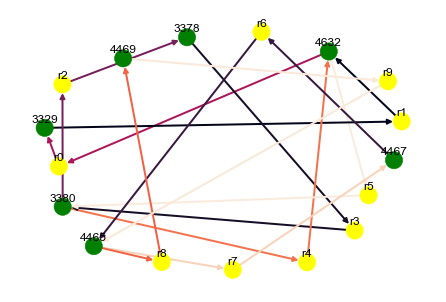

In [158]:
import networkx as nx

 

def drw_graph(rules, rules_to_show):
   
    G1 = nx.DiGraph()
    
    color_map = []
    N=50
    colors = np.random.rand(N)
    strs = ['r0','r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9',
           'r10','r11', 'r12', 'r13', 'r14', 'r15', 'r16', 'r17', 'r18', 'r19']

 

    for i in range(rules_to_show):
        G1.add_nodes_from(['r'+str(i)])
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, 'r'+str(i), color = colors[i], weight =2)
        
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge('r'+str(i), c, color = colors[i], weight=2)

 

    for node in G1:
        found_a_string = False
        for item in strs:
            if node == item:
                found_a_string =True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')
                
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

 

    pos = nx.spring_layout(G1, k =16, scale =1)
    nx.draw(G1, pos, edges =edges, node_color = color_map, edge_color = colors, width = weights, font_size = 20, with_label =False)
    
    for p in pos:
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()
    
drw_graph(rules_q1, 10)

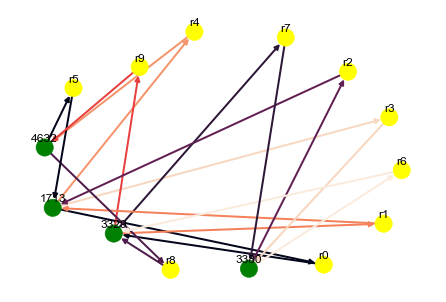

In [159]:
import networkx as nx

 

def drw_graph(rules, rules_to_show):
   
    G1 = nx.DiGraph()
    
    color_map = []
    N=50
    colors = np.random.rand(N)
    strs = ['r0','r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9',
           'r10','r11', 'r12', 'r13', 'r14', 'r15', 'r16', 'r17', 'r18', 'r19']

 

    for i in range(rules_to_show):
        G1.add_nodes_from(['r'+str(i)])
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, 'r'+str(i), color = colors[i], weight =2)
        
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge('r'+str(i), c, color = colors[i], weight=2)

 

    for node in G1:
        found_a_string = False
        for item in strs:
            if node == item:
                found_a_string =True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')
                
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

 

    pos = nx.spring_layout(G1, k =16, scale =1)
    nx.draw(G1, pos, edges =edges, node_color = color_map, edge_color = colors, width = weights, font_size = 20, with_label =False)
    
    for p in pos:
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()
    
drw_graph(rules_q2, 10)

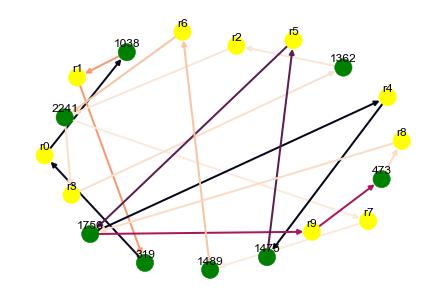

In [160]:
import networkx as nx

 

def drw_graph(rules, rules_to_show):
   
    G1 = nx.DiGraph()
    
    color_map = []
    N=50
    colors = np.random.rand(N)
    strs = ['r0','r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9',
           'r10','r11', 'r12', 'r13', 'r14', 'r15', 'r16', 'r17', 'r18', 'r19']

 

    for i in range(rules_to_show):
        G1.add_nodes_from(['r'+str(i)])
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, 'r'+str(i), color = colors[i], weight =2)
        
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge('r'+str(i), c, color = colors[i], weight=2)

 

    for node in G1:
        found_a_string = False
        for item in strs:
            if node == item:
                found_a_string =True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')
                
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

 

    pos = nx.spring_layout(G1, k =16, scale =1)
    nx.draw(G1, pos, edges =edges, node_color = color_map, edge_color = colors, width = weights, font_size = 20, with_label =False)
    
    for p in pos:
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()
    
drw_graph(rules_q3, 10)

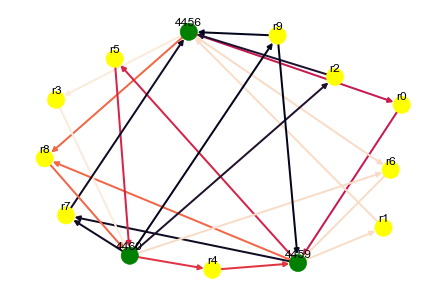

In [161]:
import networkx as nx

 

def drw_graph(rules, rules_to_show):
   
    G1 = nx.DiGraph()
    
    color_map = []
    N=50
    colors = np.random.rand(N)
    strs = ['r0','r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9',
           'r10','r11', 'r12', 'r13', 'r14', 'r15', 'r16', 'r17', 'r18', 'r19']

 

    for i in range(rules_to_show):
        G1.add_nodes_from(['r'+str(i)])
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, 'r'+str(i), color = colors[i], weight =2)
        
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge('r'+str(i), c, color = colors[i], weight=2)

 

    for node in G1:
        found_a_string = False
        for item in strs:
            if node == item:
                found_a_string =True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')
                
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

 

    pos = nx.spring_layout(G1, k =16, scale =1)
    nx.draw(G1, pos, edges =edges, node_color = color_map, edge_color = colors, width = weights, font_size = 20, with_label =False)
    
    for p in pos:
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()
    
drw_graph(rules_q4, 10)

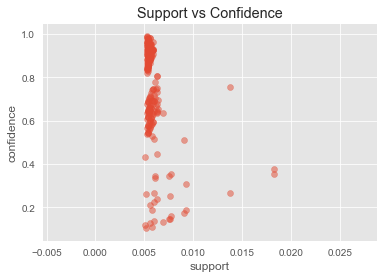

In [76]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

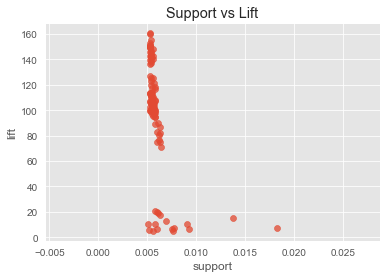

In [78]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

Text(0, 0.5, 'confidence')

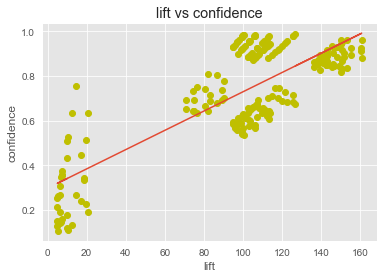

In [81]:
#lift Vs Confidence
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))
plt.title('lift vs confidence')
plt.xlabel('lift')
plt.ylabel('confidence')

The confidence level for the rule is 0.416, which shows that out of all the transactions that contain both ‘avocado’ and ‘spaghetti’, 41.6 percent contain ‘milk’ too.


The lift of 1.241 tells us that ‘milk’ is 1.241 times more likely to be bought by the customers who buy both ‘avocado’ and ‘spaghetti’ compared to the default likelihood sale of ‘milk.’

# Both X and Y can be placed on the same shelf, so that buyers of one item would be prompted to buy the other.
# Promotional discounts could be applied to just one out of the two items.
# Advertisements on X could be targeted at buyers who purchase Y.
# X and Y could be combined into a new product, such as having Y in flavors of X.

In [65]:
Results1 = list(rules)
Results1

['antecedents',
 'consequents',
 'antecedent support',
 'consequent support',
 'support',
 'confidence',
 'lift',
 'leverage',
 'conviction']

In [67]:
df_results = pd.DataFrame(Results1)

In [68]:
df_results.head()

,0
0,antecedents
1,consequents
2,antecedent support
3,consequent support
4,support
